# SAE : Analyse de données

## Introduction : Liste de nos fonctions ##
Il faut exécuter ce code pour faire fonctionner les codes d'analyse

Les données qui ont servi à faire les graphiques qui vont suivre ont toutes été récoltées entre mercredi 8h et jeudi 8h.

In [11]:
from math import *
import json, mplcursors
import matplotlib.pyplot as plot

#fonction pour faire la moyenne d'un tableau
def moyenne(t):
    moyenne=0
    for i in range(len(t)):
        moyenne+=t[i]
    return moyenne/len(t)

#fonction pour faire la variance d'un tableau en réutilisant la fonction moyenne
def variance(t):
    moy = moyenne(t)
    var = 0
    for i in range (len(t)):
        var+=(t[i]-moy)**2
    return var/len(t)

#fonction pour faire l'écart type d'un tableau en réutilisant la fonction variance
def ecarttype (t):
    return sqrt(variance(t))

#fonction pour faire la covariance entre deux tableauxen réutilisant la fonction moyenne
def covariance(t1,t2):
    cov=0
    moy1=moyenne(t1)
    moy2=moyenne(t2)
    for i in range (len(t1)):
        cov+=(t1[i]-moy1)*(t2[i]-moy2)
    return cov/len(t1)

#fonction pour faire la corrélation entre deux tableaux en réutilisant les fonctions covariance et variance
def correlation(t1,t2):
    varian=variance(t1)*variance(t2)
    ecart=sqrt(varian)
    corre=abs(covariance(t1,t2)/ecart)
    return corre


#fonction pour faire une courbe de suivi d'une donnée
def courbe(x,y,nom):
    plot.plot(x,y)
    plot.xlabel('Temps')
    plot.ylabel(nom)  
    plot.show()

def pourcentage (t,tot):
    tab=[]
    for i in range (len(t)):
        tab.append(round((t[i]/tot*100),2))
    return tab

def lecture(fichier):
    with open(fichier) as file:
        data = json.load(file)
    return data

# Récupérer les places de chaque parking
def chargevoiture(data):
    parkings = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in parkings:
                parkings[parking_name] = []
            parkings[parking_name].append(parking_info['place'])
    return parkings

# Récupérer les places totales de chaque parking
def chargetotal(data):
    parkingstot = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in parkingstot:
                parkingstot[parking_name] = []
            parkingstot[parking_name].append(parking_info['placetotal'])
    return parkingstot

def chargeveloplace(data):
    place = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in place:
                place[parking_name] = []
            place[parking_name].append(parking_info['placelibre'])
    return place

def chargevelodispo(data):
    velo = {}
    for entry in data:
        for parking_name, parking_info in entry.items():
            if parking_name not in velo:
                velo[parking_name] = []
            velo[parking_name].append(parking_info['velodispo'])
    return velo

# Fonction qui crée un tableau de tableau de places disponibles pour chaque parking
def tableaucor(dico):
    tab=[]
    for cle,valeur in dico.items():
        tab.append(valeur)
    return tab

#fonction pour faire la matrice de corrélation d'un tableau de tableaux en réutilisant la fonction correlation sans mise en forme (un tableau de tableaux)
def correlationmatrice (t):
    tableau=[]
    for j in range (len(t)):
        tab1=[]
        for k in range(len(t)):
            if variance(t[j])==0 or variance(t[k])==0:
                tab1.append(0)
            else: 
                tab1.append(round(correlation(t[j],t[k]),6))
        tableau.append(tab1)
    return tableau


def analysecroisee (t1, t2):
    tableau=[]
    for j in range (len(t1)):
        tab1=[]
        for k in range(len(t2)):
            if variance(t1[j])==0 or variance(t2[k])==0:
                tab1.append(0)
            else: 
                tab1.append(round(correlation(t1[j],t2[k]),6))
        tableau.append(tab1)
        tab1=[]
    return tableau

#fonction de mise en forme de la matrice de corrélation (je n'ai pas utilisé d'heatmap mais imshow)
def MEF (data):
    tableau=correlationmatrice(tableaucor(data))
    fig, ax = plot.subplots()
    cax = ax.imshow(tableau, cmap='Blues')
    fig.colorbar(cax)
    plot.show()

def MEFcroisee (t1,t2):
    tableau=analysecroisee(t1,t2)
    plot.imshow(tableau, cmap='Blues')
    
    plot.colorbar()
    plot.show()
    
def tempsConversion(chaine, repet):
    # Étape 1 : Extraire "8h30" et séparer les heures et minutes
    partie_heure = chaine.split('.')[2]  # Extraction de "8h30"
    heures, minutes = map(int, partie_heure.split('h'))  # Convertit en entiers

    # Étape 2 : Créer une liste vide pour stocker les temps
    temps = []

    # Étape 3 : Boucle pour ajouter des incréments de 5 minutes
    for _ in range(repet):  # Exemple pour générer 10 itérations
        # Ajouter le temps actuel dans la liste
        temps.append(f"{heures:02}h{minutes:02}")
        
        # Ajouter 5 minutes
        minutes += 10
        
        # Gérer les minutes > 60
        if minutes >= 60:
            minutes -= 60
            heures += 1


        # Gérer les heures > 24
        if heures >= 24:
            heures = 0

    # Afficher la liste résultante
    return temps

def affichageDuree(x,y,repetition, duree, axe):
    # Sélectionner les ticks à afficher (chaque 5ème élément)
    interval = repetition  # Afficher tous les repetition éléments
    ticks_to_display = duree[:len(duree):interval]  # Sélectionner tous les repetitions éléments de duree
    plot.setp(axe[x, y].xaxis.get_majorticklabels(), rotation=45, ha="right")

    # Appliquer les ticks à l'axe des x
    axe[x, y].set_xticks(ticks_to_display)

## Partie 1 : Analyse des données des parkings de voitures

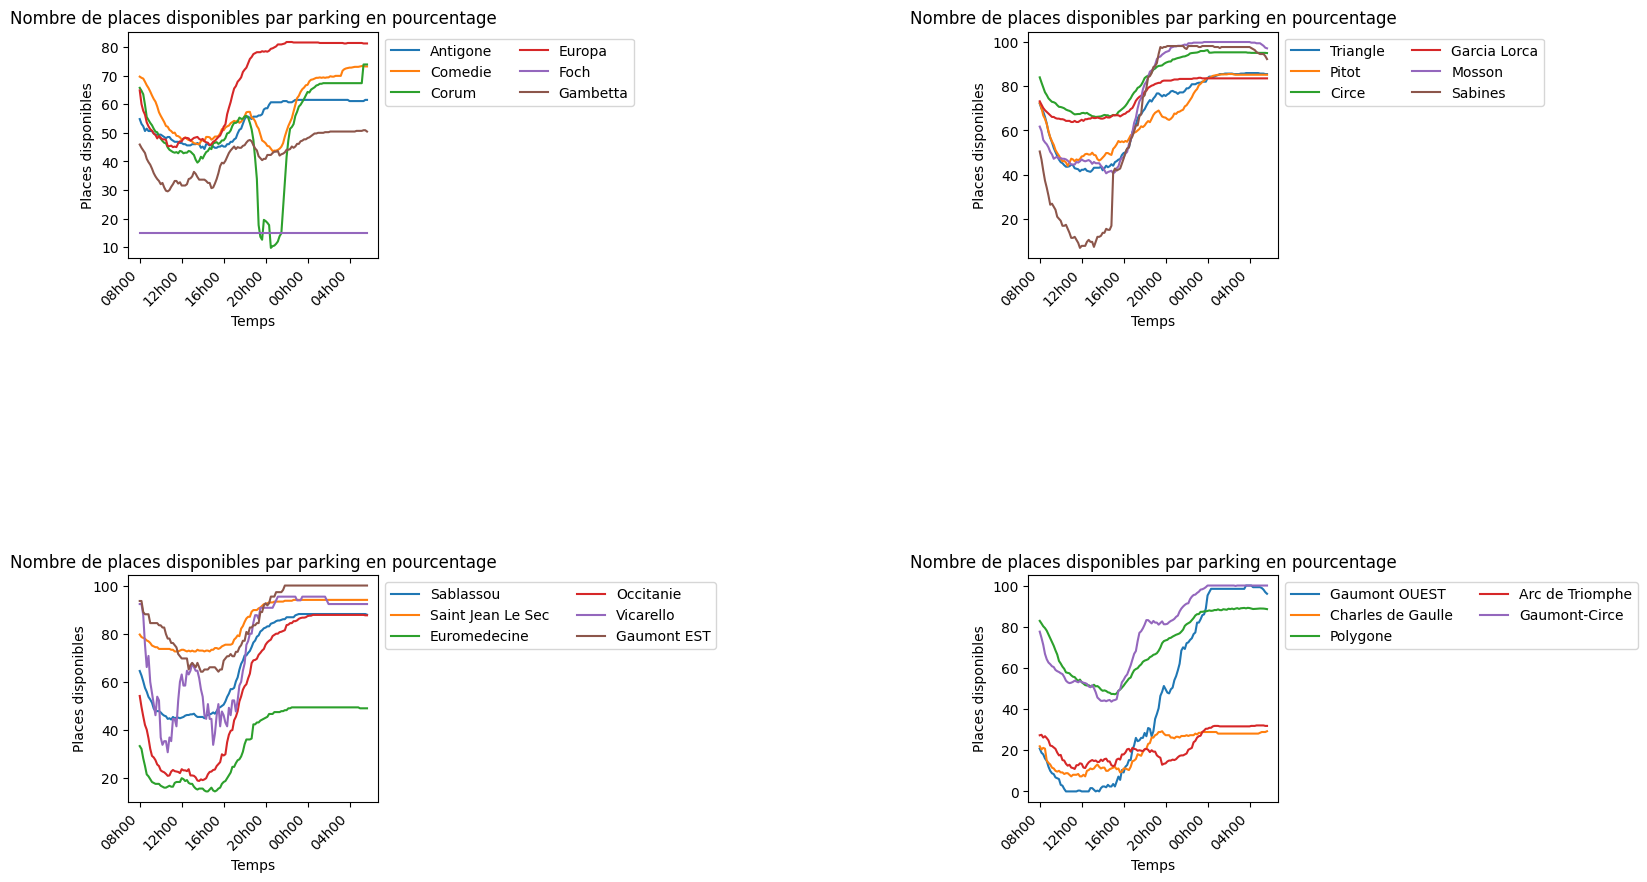

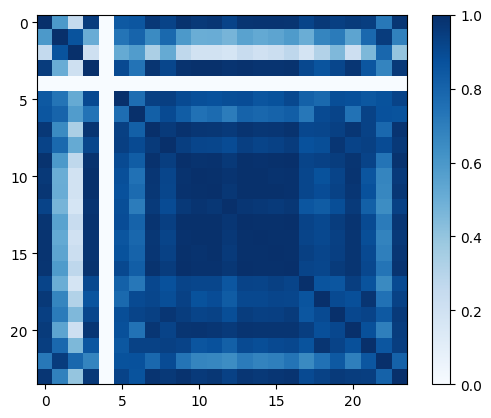

In [12]:
import matplotlib.pyplot as plt
import json 

fichierVoiture = "22.01.8h00.json"

# Ensure the correct path to the data files
with open('../données/Voiture/'+fichierVoiture, 'r') as file:
    data = json.load(file)

with open('../données/Voiture/placeTotal/placeTotalVoiture.json', 'r') as file:
    data3 = json.load(file)

repetition = len(data)
duree = tempsConversion("22.01.8h00", repetition)

# Création de l'image
fig, axs = plt.subplots(3, 4, figsize=(20, 10))  # 3 lignes, 4 colonne

# Premier graphique
axs[0,0].set_title('Nombre de places disponibles par parking en pourcentage')

for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[:6]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[0,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axs[0,0].set_xlabel('Temps')
axs[0,0].set_ylabel('Places disponibles')
axs[0,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Deuxième graphique

axs[0,3].set_title('Nombre de places disponibles par parking en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[7:13]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[0,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axs[0,3].set_xlabel('Temps')
axs[0,3].set_ylabel('Places disponibles')
axs[0,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Troisième graphique
axs[2,0].set_title('Nombre de places disponibles par parking en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[13:19]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[2,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axs[2,0].set_xlabel('Temps')
axs[2,0].set_ylabel('Places disponibles')
axs[2,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Quatrième graphique
axs[2,3].set_title('Nombre de places disponibles par parking en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevoiture(data).items())[19:25]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axs[2,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axs[2,3].set_xlabel('Temps')
axs[2,3].set_ylabel('Places disponibles')
axs[2,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)


# appel d'une fonction permettant l'affichage de la durée de la simulation de manière plus lisible
affichageDuree(0,0,24,duree,axs)
affichageDuree(0,3,24,duree,axs)
affichageDuree(2,0,24,duree,axs)
affichageDuree(2,3,24,duree,axs)

# Laisser ligne et colonne vide
fig.delaxes(axs[0, 1])
fig.delaxes(axs[0, 2])
fig.delaxes(axs[1, 1])
fig.delaxes(axs[1, 2])
fig.delaxes(axs[1, 0])
fig.delaxes(axs[2, 1])
fig.delaxes(axs[2, 2])
fig.delaxes(axs[1, 3])

# Ajuster la taille du graphique pour laisser de la place à la légende
fig.subplots_adjust(right=0.7)

# Afficher le graphique
plt.show()

# curseur sur la heatmap
MEF(chargevoiture(data))

Pour commencer on remarque que le compteur du parking Foch ne doit pas fonctionner correctement car le pourcentage de places libres ne change pas sur une journée et il est identique sur d'autres données récupérées.

On peut remarquer que  les parkings ont tendance à se comporter de la même manière à l'exception du parking Corum qui a une chute de sa disponibilité vers 20h. En effet tous les autres parkings ont une chute de leur disponibilité entre 8h et 18h. Cela correspond aux horaires de travail. On peut donc en déduire qu'il s'agit de parkings où les personnes se garent pour aller travailler. Car durant la nuit il y a une disponibilité avoisinant les 80%. Pour le parking Corum on peut penser qu'il y a un espace de sortie nocturne qui attire les utilisateurs entre 20h et minuit.

Les parkings Sabines, Euromédecine, Gaumont OUEST sont quasiment complets entre midi et 16h, il reste moins de 10% des places libres. On pourrait donc ajouter des places dans ces parkings même si cela ne serait pas utile en dehors de ces horaires

A contrario, les parkings Circe, Garcia Lorca et Saint Jean le Sec ne descendent pas en dessous de 75% de places libres en semaines. On peut donc penser qu'ils sont trop grand en semaine. Comme nous n'avons pas de données le week-end, nous ne savons pas si la tendance est différente.7

Il y a une corrélation importante entre tous les parking sauf un on peut en déduire qu'il s'agit du parking Corum. La ligne blanche représente le parking Foch. Ses données ne sont pas utilisables.

## Partie 2 : Analyse des données des parkings vélo

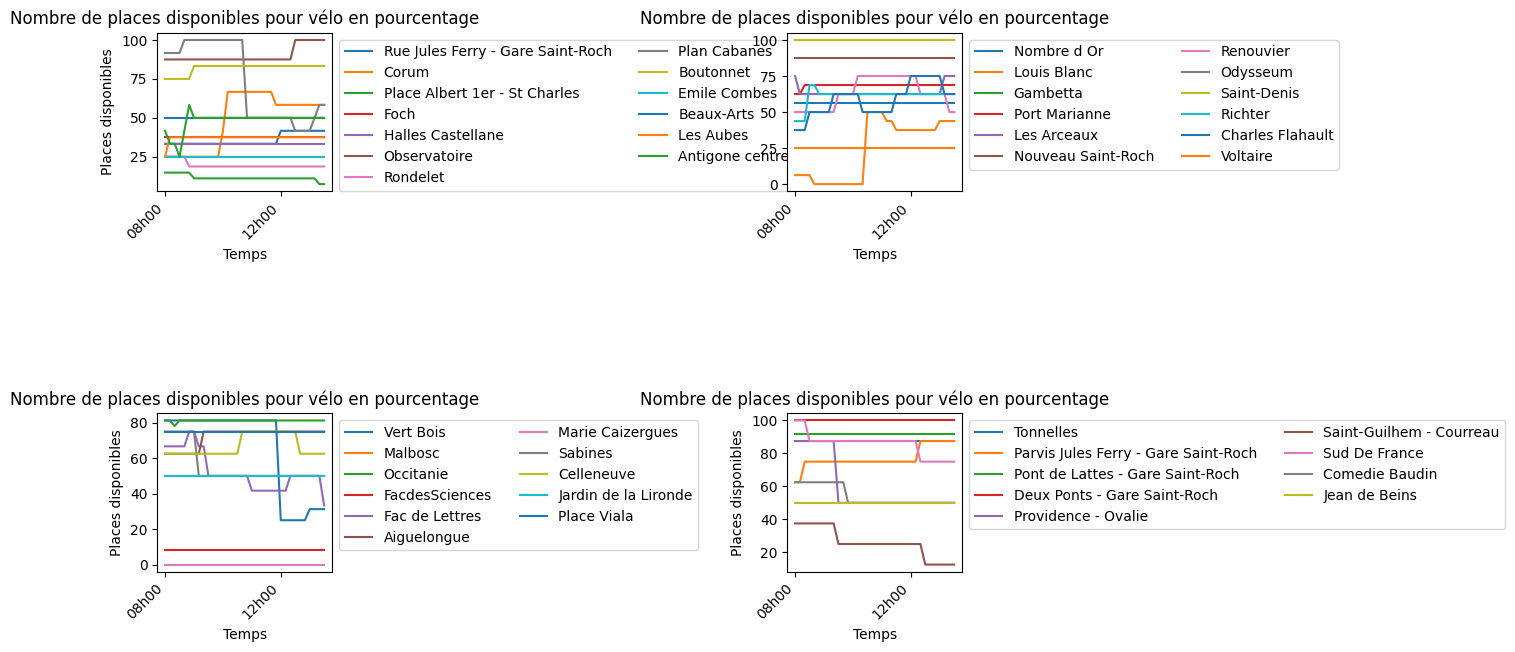

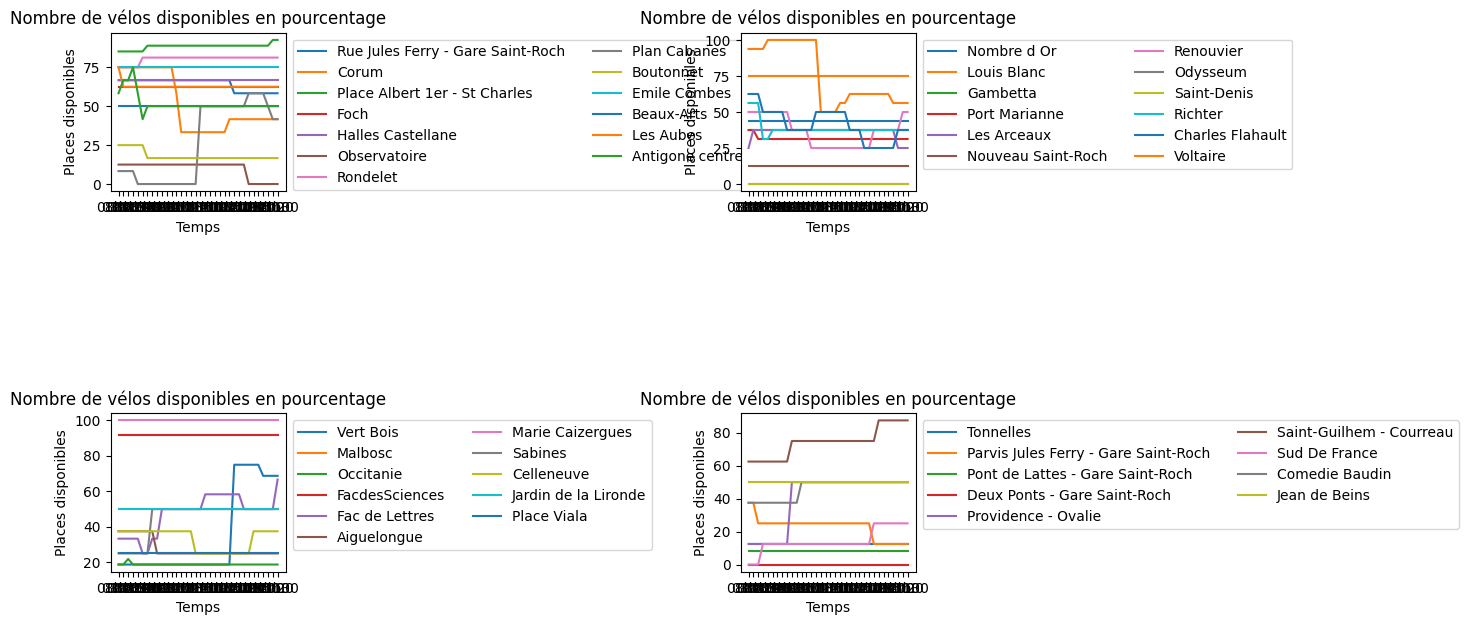

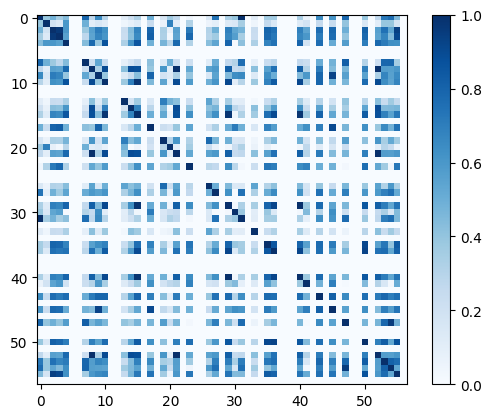

In [13]:
import matplotlib.pyplot as plt
import json

with open('../données/Vélo/22.01.8h00.json', 'r') as file:
    data = json.load(file)
    
repetition = len(data)
duree = tempsConversion("22.01.8h00", repetition)

with open('../données/Vélo/placeTotal/placeTotalVélo.json', 'r') as file:
    data3 = json.load(file)

# Création de l'image 1
fig1, axe1 = plt.subplots(3, 4, figsize=(14, 7))  # 3 lignes, 4 colonne

# Premier graphique
axe1[0,0].set_title('Nombre de places disponibles pour vélo en pourcentage')

for i, (parking_name, places) in enumerate(list(chargeveloplace(data).items())[:15]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe1[0,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axe1[0,0].set_xlabel('Temps')
axe1[0,0].set_ylabel('Places disponibles')
axe1[0,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Deuxième graphique
axe1[0,3].set_title('Nombre de places disponibles pour vélo en pourcentage')
for i, (parking_name, places) in enumerate(list(chargeveloplace(data).items())[16:30]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe1[0,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axe1[0,3].set_xlabel('Temps')
axe1[0,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Troisième graphique
axe1[2,0].set_title('Nombre de places disponibles pour vélo en pourcentage')
for i, (parking_name, places) in enumerate(list(chargeveloplace(data).items())[31:45]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe1[2,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axe1[2,0].set_xlabel('Temps')
axe1[2,0].set_ylabel('Places disponibles')
axe1[2,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Quatrième graphique
axe1[2,3].set_title('Nombre de places disponibles pour vélo en pourcentage')
for i, (parking_name, places) in enumerate(list(chargeveloplace(data).items())[46:60]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe1[2,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axe1[2,3].set_xlabel('Temps')
axe1[2,3].set_ylabel('Places disponibles')
axe1[2,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

affichageDuree(0,0,24,duree,axe1)
affichageDuree(0,3,24,duree,axe1)
affichageDuree(2,0,24,duree,axe1)
affichageDuree(2,3,24,duree,axe1)

# Laisser ligne et colonne vide vide
fig1.delaxes(axe1[0, 1])
fig1.delaxes(axe1[0, 2])
fig1.delaxes(axe1[1, 1])
fig1.delaxes(axe1[1, 2])
fig1.delaxes(axe1[1, 0])
fig1.delaxes(axe1[2, 1])
fig1.delaxes(axe1[2, 2])
fig1.delaxes(axe1[1, 3])

# Ajuster la taille du graphique pour laisser de la place à la légende
fig1.subplots_adjust(right=0.7)

# Afficher le graphique
plt.show()

# Création de l'image 2
fig2, axe2 = plt.subplots(3, 4, figsize=(14, 7))  # 3 lignes, 4 colonne

# Premier graphique
axe2[0,0].set_title('Nombre de vélos disponibles en pourcentage')

for i, (parking_name, places) in enumerate(list(chargevelodispo(data).items())[:15]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe2[0,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)

axe2[0,0].set_xlabel('Temps')
axe2[0,0].set_ylabel('Places disponibles')
axe2[0,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Deuxième graphique
axe2[0,3].set_title('Nombre de vélos disponibles en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevelodispo(data).items())[16:30]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe2[0,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axe2[0,3].set_xlabel('Temps')
axe2[0,3].set_ylabel('Places disponibles')
axe2[0,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Troisième graphique
axe2[2,0].set_title('Nombre de vélos disponibles en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevelodispo(data).items())[31:45]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe2[2,0].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axe2[2,0].set_xlabel('Temps')
axe2[2,0].set_ylabel('Places disponibles')
axe2[2,0].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Quatrième graphique
axe2[2,3].set_title('Nombre de vélos disponibles en pourcentage')
for i, (parking_name, places) in enumerate(list(chargevelodispo(data).items())[46:60]) :
    for parking_name_tot, placestot in chargetotal(data3).items():
        if parking_name == parking_name_tot:
            axe2[2,3].plot(duree, pourcentage(places, placestot[0]), label=parking_name)
axe2[2,3].set_xlabel('Temps')
axe2[2,3].set_ylabel('Places disponibles')
axe2[2,3].legend(loc='upper left', bbox_to_anchor=(1, 1), ncol=2)

# Laisser ligne et colonne vide vide
fig2.delaxes(axe2[0, 1])
fig2.delaxes(axe2[0, 2])
fig2.delaxes(axe2[1, 1])
fig2.delaxes(axe2[1, 2])
fig2.delaxes(axe2[1, 0])
fig2.delaxes(axe2[2, 1])
fig2.delaxes(axe2[2, 2])
fig2.delaxes(axe2[1, 3])

# Ajuster la taille du graphique pour laisser de la place à la légende
fig2.subplots_adjust(right=0.7)

# Afficher le graphique
plt.show()

MEF(chargevelodispo(data))


Dans un premier lieu nous remarquons qu'il y a bien un lieu entre les courbes de disponibilité des vélos et celle des places libres pour les vélos. En effet lorsqu'il y a 100% de places libres, il y a 0 vélo disponible et ce peu importe la situation.

On remarque qu'il y a plusieurs parkings où il n'y a pas d'emplacements disponibles (ex : Marie Caizergues) et d'autres sans vélos disponibles (ex : Occitanie, Saint-Denis, Deux Ponts-Gare Saint Roch). Il y a donc besoin de faire des ajustements de la localisation des vélos car dans certains car cela n'évolue pas en 24h. Cependant il y a des parkings où les ajustements sont fait quand cela s'avère nécessaire (exemple : Plan Cabanes, Voltaire, Province-Ovalie, Vert-Bois ). En effet on y remarque de gros changements dans les disponibilités on peut donc penser qu'il s'agit d'ajustements.

La disponibilité dans les parkings ne suis pas de schéma global, il n'y a donc pas de corrélation entre les parkings sauf exceptions probablement lié au hasard. Les lignes et colonnes blanches sont celles où il n'y a pas eu de changement pendant 24h.

## Partie 3 : Analyse croisée des données

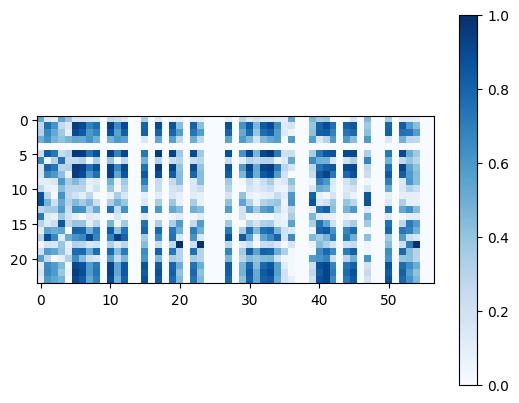

In [14]:
with open('../données/Vélo/22.01.22h.json', 'r') as file:
    data_velo = json.load(file)

with open('../données/Voiture/22.01.22h.json', 'r') as file:
    data_voiture = json.load(file)

tableauvoiture = chargevoiture(data_voiture)
tableauvelo = chargeveloplace(data_velo)

MEFcroisee(tableaucor(tableauvoiture), tableaucor(tableauvelo))

Il y a des parkings vélo/voiture où la corrélation est proche de 1, soit cela peut être un hasard soit le système vélo voiture fonctionne dans certains cas où les parkings sont rapprochés. A l'inverse, il y a des parkings vélo/voiture où la corrélation est proche de 0 donc il n'y a aucun lien et le système probablement à cause de la distance.

Il y a une corrélation en moyenne à 0,5. On peut donc dire que le système vélo/voiture fonctionne dans une majorité des cas où les parkings sont rapproché mais si le graphique semble avoir beaucoup de corrélation faible cela est du à la distance qui sépare les parkings.